<a href="https://colab.research.google.com/github/Lee-Gunju/Lee-Gunju/blob/master/Leegunju_assign_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Plot the training data [1pt]



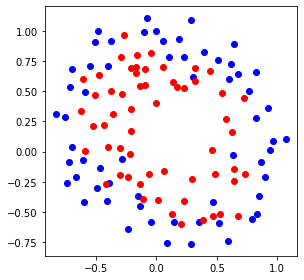

In [43]:
import numpy as np
import matplotlib.pyplot as plt

data    = np.genfromtxt("data-nonlinear.txt", delimiter=',')

pointX  = data[:, 0]
pointY  = data[:, 1]
label   = data[:, 2]

pointX0 = pointX[label == 0]
pointY0 = pointY[label == 0]

pointX1 = pointX[label == 1]
pointY1 = pointY[label == 1]

plt.figure()
plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


In [0]:

def load_data():
  data = np.genfromtxt('data-nonlinear.txt', delimiter = ',')
  X = points[:,0:2]
  y = points[:,2]
  y = y.reshape((len(y),1))
  return X.T, y.T

def fea_map(X1, X2, shape, degree = 6):
  new_X = np.ones((degree, shape))
  new_X[0,:] = (X1)
  new_X[1,:] = (X2)
  new_X[2,:] = (X1**2)
  new_X[3,:] = (X2**2)
  new_X[4,:] = (X1*X2)
  new_X[5,:] = ((X1*X2)**2)
  return new_X


def plt_data(X, y):
  acct = plt.scatter(X[0, np.where(y == 1)], X[1, np.where(y == 1)], color='blue' )
  not_acct = plt.scatter(X[0, np.where(y == 0)], X[1, np.where(y == 0)], color='red')
  plt.legend(handles=[acct, not_acct], loc = 3)
  plt.show()


def initial_zero(dim):
  W = np.zeros(shape=(dim, 1))
  b = 0
  return W, b


def predict(W, b, X):
  m = X.shape[1]
  y_hat = np.zeros((1,m))
  W = W.reshape(X.shape[0], 1)
  A = sigmoid(np.dot(W.T, X) + b)
  
  for i in range(A.shape[1]):
    if A[0,i] > 0.5:
      y_hat[0,i] = 1
    else:
      y_hat[0,i] = 0
  return y_hat



def sigmoid(Z):
  A = 1 / (1 + np.exp(-Z))
  return A

def propa(W, b, X, y):
  m = X.shape[1]
  A = sigmoid(np.dot(W.T, X) + b)
  cost = - (1 / m) * np.sum((y * np.log(A)) + ((1 - y) * np.log(1 - A)))
  dw = (1 / m) * np.dot(X, (A - y).T)
  db = (1 / m) * np.sum(A - y)
  cost = np.squeeze(cost)
  grads = {"dw": dw, "db": db}
  return grads, cost

def optimize(W, b, X, y, num_iterations, learning_rate):
  costs = []
  accuracys = []
  for i in range(num_iterations):
    grads, cost = propa(W, b, X, y)
    dw = grads["dw"]
    db = grads["db"]
    W = W - learning_rate * dw
    b = b - learning_rate * db
    if i % 100 == 0:
      plot_predicted_data(X, y, W, b)
      hat = predict(W, b, X)
      acc = 100 - np.mean(np.abs(hat - y)) * 100
      accuracys.append(acc)
      costs.append(cost)

  params = {"W": W, "b": b}
  grads = {"dw": dw, "db": db}
  return params, grads, costs, accuracys

def model(X, y, num_iterations = 10000, learning_rate = 0.1):
  W, b = initial_zero(X.shape[0])
  parameters, grads, costs, accuracys = optimize(W, b, X, y, num_iterations, learning_rate)
  W = parameters["W"]
  b = parameters["b"]

  y_hat = predict(W, b, X)
  print("Train accuracy: {} %".format(100 - np.mean(np.abs(y_hat - y)) * 100))
  h = {"costs": costs, "acc" : accuracys, "W" : W, "b" : b, "learning_rate" : learning_rate,"num_iterations": num_iterations}
  return h

def cost_plt(cost_list1):
  plt.figure(2)
  plt.plot(cost_list1, color = 'blue')
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.show()

def accuracy(accuracy_list):
  plt.figure(2)
  plt.plot(accuracy_list, color = 'red')
  plt.show()


def predict_list(X, y, W, b):
  plt.clf()
  acct = plt.scatter(X[0, np.where(y == 1)], X[1, np.where(y == 1)], color='blue' )
  not_acct = plt.scatter(X[0, np.where(y == 0)], X[1, np.where(y == 0)], color='red')
  u = np.linspace(-1, 1.5, 50)
  v = np.linspace(-1, 1.5, 50)
  z = np.zeros((len(u), len(v)))
  for i in range (len(u)):
    for j in range (len(v)):
      z[i,j] = np.dot(W.T, map_feature(u[i], v[j], 1)) + b
  z = z.T

  plt.contour(u, v, z, 0)
  plt.legend(handles=[acct, not_acct], loc = 3)
  plt.draw()


3. Plot the training error [3pt][링크 텍스트](https://)

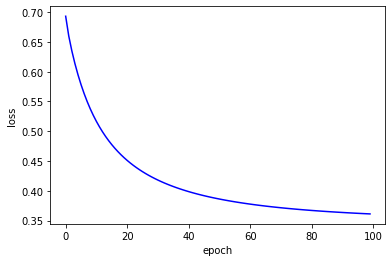

In [45]:
cost_plt(h["costs"])

4. Plot the training accuracy [3pt]



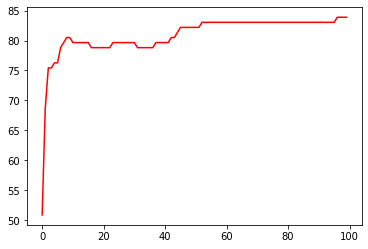

In [46]:
accuracy(h["acc"])

5. Write down the final training accuracy [5pt]

6. Plot the optimal classifier superimposed on the training data [5pt]



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:119: UserWarning: The handle <matplotlib.collections.PathCollection object at 0x7f9128355dd8> has a label of '_collection0' which cannot be automatically added to the legend.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:119: UserWarning: The handle <matplotlib.collections.PathCollection object at 0x7f91283551d0> has a label of '_collection1' which cannot be automatically added to the legend.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:119: UserWarning: The handle <matplotlib.collections.PathCollection object at 0x7f9128395f98> has a label of '_collection0' which cannot be automatically added to the legend.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:119: UserWarning: The handle <matplotlib.collections.PathCollection object at 0x7f9128395390> has a label of '_collection1' which cannot be automatically added to the legend.
/usr/local/lib/python3.6/dist-packages/ipykernel_launche

Train accuracy: 83.89830508474577 %


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:119: UserWarning: The handle <matplotlib.collections.PathCollection object at 0x7f912823dbe0> has a label of '_collection0' which cannot be automatically added to the legend.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:119: UserWarning: The handle <matplotlib.collections.PathCollection object at 0x7f912823d6a0> has a label of '_collection1' which cannot be automatically added to the legend.


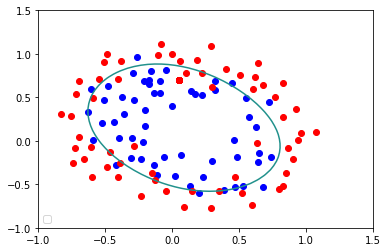

In [47]:
X = fea_map(X[0,:], X[1,:], X.shape[1])
h = model(X, y)
predict_list(X, y, h["W"], h["b"])